In [62]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Problem setup
# -------------------------
L = 1.0
Tin  = 1.0
Tout = 0.0

N = 50                 # number of intervals; nodes = N+1
dx = L / N

Pe_delta = 0.5        # cell Peclet number = v*dx/alpha (choose a value)
Pe = N * Pe_delta      # domain Peclet number = v*L/alpha

In [63]:
n = N - 1  # number of interior unknowns: T_1 ... T_{N-1}

a = (-1.0 - Pe_delta/2.0) * np.ones(n-1)  # subdiagonal (length n-1)
b = ( 2.0)               * np.ones(n)     # diagonal    (length n)
c = (-(1.0 - Pe_delta/2.0)) * np.ones(n-1) # superdiag  (length n-1)

d = np.zeros(n)  # RHS

# Apply Dirichlet BCs:
# i=1 equation contains a*T0  -> move to RHS: d[0] = -a0*T0
# i=N-1 equation contains c*TN -> move to RHS: d[-1] = -c_last*TN
T0 = Tin
TN = Tout

d[0]  -= (-1.0 - Pe_delta/2.0) * T0          # note: coefficient multiplying T0 is a_full
d[-1] -= (-(1.0 - Pe_delta/2.0)) * TN        # coefficient multiplying TN is c_full

In [64]:
# -------------------------
# Thomas algorithm
# -------------------------

bprime = np.zeros(n)   # b_i'
dprime = np.zeros(n)   # d_i'
m      = np.zeros(n-1) # m_i for i=1..n-1

# i = 0 (first equation)
bprime[0] = b[0]
dprime[0] = d[0]

# forward elimination: i = 1..n-1
for i in range(1, n):
    m[i-1] = a[i-1] / bprime[i-1]          # multiplier m_i
    bprime[i] = b[i] - m[i-1] * c[i-1]     # b_i'
    dprime[i] = d[i] - m[i-1] * dprime[i-1]# d_i'

# back substitution
T_int = np.zeros(n)
T_int[-1] = dprime[-1] / bprime[-1]

for i in range(n-2, -1, -1):
    T_int[i] = (dprime[i] - c[i] * T_int[i+1]) / bprime[i]

# assemble full solution including boundaries
T = np.zeros(N+1)
T[0] = Tin
T[N] = Tout
T[1:N] = T_int

x = np.linspace(0, L, N+1)

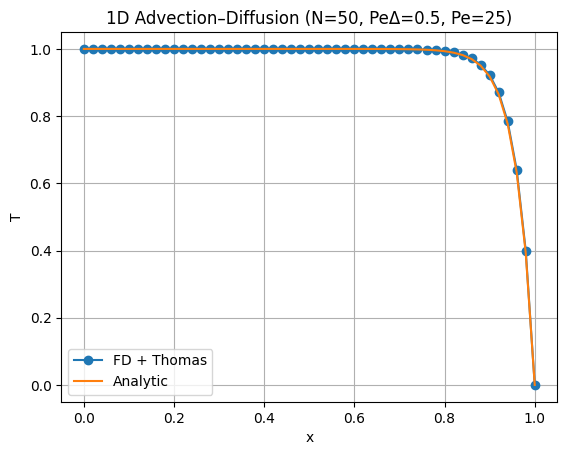

In [67]:
# analytic solution (handle small Pe with a safe fallback)
if abs(Pe) < 1e-10:
    T_exact = 1.0 - x/L
else:
    T_exact = (np.exp(Pe*x/L) - np.exp(Pe)) / (1.0 - np.exp(Pe))

plt.figure()
plt.plot(x, T, marker='o', label='FD + Thomas')
plt.plot(x, T_exact, label='Analytic')
plt.xlabel('x')
plt.ylabel('T')
plt.title(f'1D Advection–Diffusion (N={N}, PeΔ={Pe_delta:.3g}, Pe={Pe:.3g})')
plt.grid(True)
plt.legend()
plt.show()